In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(60000,784)/255.0, x_test.reshape(10000,784)/255.0
# y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [3]:
epoch = 50
batch_size = 256

In [4]:
def basic_layer(node, dropout = True, dropoutrate = 0.25, bn = True):
    layer = models.Sequential()
    layer.add(layers.Dense(node))
    if dropout:
        layer.add(layers.Dropout(dropoutrate))
    if bn:
        layer.add(layers.BatchNormalization())
    layer.add(layers.Activation('elu'))
    return layer

In [5]:
model = models.Sequential()
model.add(layers.Dense(16, input_dim=784, activation='elu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(basic_layer(32, False))
model.add(basic_layer(64))
# model.add(basic_layer(64))
# model.add(basic_layer(128, dropoutrate = 0.5))
# model.add(basic_layer(128, dropoutrate = 0.5))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 32)                672       
_________________________________________________________________
sequential_2 (Sequential)    (None, 64)                2368      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 16,314
Trainable params: 16,090
Non-trainable params: 224
__________________________________________________

In [7]:
NAG = optimizers.SGD(lr=0.01, decay=1e-4, momentum=0.9, nesterov=True)
Adam = optimizers.Adam(lr=1e-2)

model.compile(optimizer= Adam ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=epoch, 
                    batch_size=batch_size,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3303 - accuracy: 0.9015 - val_loss: 0.2291 - val_accuracy: 0.9329
Epoch 2/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1900 - accuracy: 0.9431 - val_loss: 0.1782 - val_accuracy: 0.9483
Epoch 3/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1581 - accuracy: 0.9524 - val_loss: 0.2112 - val_accuracy: 0.9398
Epoch 4/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1456 - accuracy: 0.9557 - val_loss: 0.1603 - val_accuracy: 0.9527
Epoch 5/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1348 - accuracy: 0.9593 - val_loss: 0.1801 - val_accuracy: 0.9492
Epoch 6/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1227 - accuracy: 0.9626 - val_loss: 0.1603 - val_accuracy: 0.9526
Epoch 7/50
60000/60000 [==============================] 

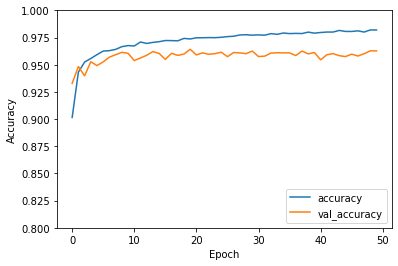

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
# plt.savefig("ann_acc_2.png", dpi=500)

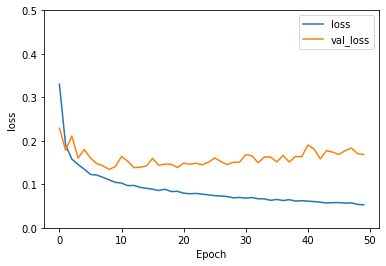

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)